In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

In [2]:
# load data 

# House election Harvard Dataverse https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/IG0UN2
district_results = pd.read_csv('1976-2018-house.csv', header=0,encoding = 'unicode_escape')
district_results['candidatevotes'] = district_results['candidatevotes'].str.replace(',', '')
district_results['candidatevotes'] = district_results['candidatevotes'].astype(int)

# 2016 Election Results https://transition.fec.gov/general/FederalElections2016.shtml
pres_gen_results_2016 = pd.read_csv('2016 Pres General Results-Table 1.csv', header=0,encoding = 'unicode_escape')
sen_results_2016 = pd.read_csv('2016 US Senate Results by State-Table 1.csv', header=0,encoding = 'unicode_escape')
house_results_2016 = pd.read_csv('2016 US House Results by State-Table 1.csv', header=0,encoding = 'unicode_escape')

Election_2016 = district_results.loc[district_results['year'] == 2016]
Election_2018 = district_results.loc[district_results['year'] == 2018]

sports_results = pd.read_csv('sports_data.csv')

states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE','DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [3]:
import glob

# get data file names
path =r'C:\DRO\DCL_rawdata_files'
filenames = glob.glob('District Data' + "/*.csv")


dfs = {}

filenames.sort()
i = 0 
for filename in filenames:
    dfs['state' + str(i)] = pd.read_csv(filename)
    i = i + 1
    

In [4]:
district_winners_2016 = pd.DataFrame()
for state in states : 
    temp = Election_2016.loc[Election_2016['state_po'] == state]
    #number of districts
    districts_number = temp['district'].max()
    while districts_number > 0 : 
        district = temp.loc[temp['district'] == districts_number]
        winner = pd.DataFrame(district.loc[district['candidatevotes'] == district['candidatevotes'].max()])
        district_winners_2016 = district_winners_2016.append(winner)
        districts_number = districts_number - 1

district_winners_2018 = pd.DataFrame()
for state in states : 
    temp = Election_2018.loc[Election_2018['state_po'] == state]
    #number of districts
    districts_number = temp['district'].max()
    while districts_number > 0 : 
        district = temp.loc[temp['district'] == districts_number]
        winner = pd.DataFrame(district.loc[district['candidatevotes'] == district['candidatevotes'].max()])
        district_winners_2018 = district_winners_2018.append(winner)
        districts_number = districts_number - 1

In [5]:
#will now correctly classify the winning party but doesn't put it into the original dataframe
    
for district in district_winners_2016.iterrows():
    # May be able to use the vote count to assign the correct value back to the original dataframe, 
    # only two winners shared an exact vote count so only 1 collision must be handled
    if district[1]['party'] == 'republican' : 
        district_winners_2016.loc[district[0],'class'] = 0
    elif district[1]['party'] == 'democrat' :
        district_winners_2016.loc[district[0],'class'] = 1
    else:
        district_winners_2016.loc[district[0],'class'] = 2

for district in district_winners_2018.iterrows():
    # May be able to use the vote count to assign the correct value back to the original dataframe, 
    # only two winners shared an exact vote count so only 1 collision must be handled
    if district[1]['party'] == 'republican' : 
        district_winners_2018.loc[district[0],'class'] = 0
    elif district[1]['party'] == 'democrat' :
        district_winners_2018.loc[district[0],'class'] = 1
    else:
        district_winners_2018.loc[district[0],'class'] = 2


In [6]:

percentage_below_poverty_line = []
percent_bachelor = []
percent_hs = []
for state in dfs:
    num_cols = len(dfs[state].columns)
    stats_pl = dfs[state][dfs[state]['Subject'] == 'Percentage of Families and People Whose Income in the Past 12 Months is Below the Poverty Level'].iloc[0:1,]
    stats_ba = dfs[state][dfs[state]['Title'] == "Percent bachelor's degree or higher"]
    stats_hs = dfs[state][dfs[state]['Title'] == "Percent high school graduate or higher"]
    pl_mean_sum = 0
    hs_mean_sum = 0
    ba_mean_sum = 0
    for col in range(num_cols):
        if col < 3:
            continue
        elif (col % 2) != 0:
            pl_mean_sum += float(stats_pl.iloc[:,col].values[0])
            hs_mean_sum += float(stats_hs.iloc[:,col].values[0])
            ba_mean_sum += float(stats_ba.iloc[:,col].values[0])
        else:
            continue
            
    pl_mean = pl_mean_sum / ((num_cols - 3)/2)
    percentage_below_poverty_line.append(pl_mean)
    
    hs_mean = hs_mean_sum / ((num_cols - 3)/2)
    
    ba_mean = ba_mean_sum / ((num_cols - 3)/2)
    
    percent_hs.append(hs_mean)
    percent_bachelor.append(ba_mean)
    
    

In [7]:
sports_results['poverty'] = pd.Series(percentage_below_poverty_line)
sports_results['bachelors'] = pd.Series(percent_bachelor)
sports_results['hs'] = pd.Series(percent_hs)

In [8]:
#### LUKE
#Real GDP per capita by state by year
rGDP_pc_2015 = pd.read_csv('Real_GDP_pc/2015_rGDP_edit.csv')
rGDP_pc_2016 = pd.read_csv('Real_GDP_pc/2016_rGDP_edit.csv')
rGDP_pc_2017 = pd.read_csv('Real_GDP_pc/2017_rGDP_edit.csv')
#Unemployment delta by state, 2016--2018
## US national delta = -1%
unemp_delta = pd.read_csv('unemp_delta.csv')
rGDP_pc_2015.columns = ['state','2015_GDP']
economic_indicators = rGDP_pc_2015.copy()
economic_indicators['2016_GDP'] = rGDP_pc_2016['value']
economic_indicators['2017_GDP'] = rGDP_pc_2017['value']
economic_indicators = economic_indicators.merge(unemp_delta, on = 'state')

economic_indicators['state'] = states



In [9]:
sports_results

,State,cfb,nfl,nba,cbb,average,poverty,bachelors,hs
0,AK,0.5650,0.846,0.720,0.5170,0.662000,7.500000,30.200000,93.300000
1,AL,0.9330,0.813,0.293,0.5560,0.648750,12.471429,25.300000,86.485714
2,AR,0.1420,0.625,0.268,0.6570,0.423000,12.775000,23.100000,87.175000
3,AZ,0.6660,0.500,0.256,0.7710,0.548250,10.244444,29.400000,87.111111
4,CA,0.6360,0.813,0.707,0.6360,0.698000,9.303774,33.383019,83.313208
5,CO,0.4100,0.375,0.561,0.5310,0.469250,6.300000,41.471429,91.900000
6,CT,0.0830,0.688,0.671,0.4375,0.469875,7.080000,39.560000,90.940000
7,DC,0.5650,0.438,0.524,0.6010,0.532000,11.300000,60.400000,92.100000
8,DE,0.5830,0.563,0.634,0.4200,0.550000,8.400000,31.300000,89.800000
9,FL,0.7690,0.438,0.537,0.6170,0.590250,9.840741,30.314815,88.437037


In [10]:
pres_by_state = pres_gen_results_2016[pres_gen_results_2016['WINNER INDICATOR']=='W']
for state in pres_by_state.iterrows():
    if state[1]['LAST NAME'] == 'Trump' : 
        pres_by_state.loc[state[0],'pres_class'] = 0.0
    else:
        pres_by_state.loc[state[0],'pres_class'] = 1.0
pres_by_state = pres_by_state[['STATE ABBREVIATION', 'pres_class']]

pres_by_state['State'] = pres_by_state['STATE ABBREVIATION']
pres_by_state = pres_by_state.drop('STATE ABBREVIATION', axis=1)
# pres_class tells us which party won that state in the 2016 presidential election

/anaconda3/envs/tfcs109a/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/envs/tfcs109a/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
district_winners_2018['incumbency'] = list(district_winners_2016['class'])

In [12]:
model_frame = district_winners_2018[['state_po','state_fips','district','incumbency','class']]

In [13]:
model_frame = model_frame.join(sports_results.set_index('State'), on='state_po', how='inner')
model_frame = model_frame.join(pres_by_state.set_index('State'), on='state_po', how='inner')

In [14]:
model_frame = model_frame.drop('state_fips', axis=1)

In [15]:
model_frame['state_district'] = model_frame.apply(lambda row: row.state_po + str(row.district), axis=1)

In [16]:
model_frame = model_frame.drop(['average','district'], axis=1)

In [17]:
model_frame.set_index('state_district')

,state_po,incumbency,class,cfb,nfl,nba,cbb,poverty,bachelors,hs,pres_class
state_district,,,,,,,,,,,
AL7,AL,1.0,1.0,0.933,0.813,0.293,0.556,12.471429,25.3,86.485714,0.0
AL6,AL,0.0,0.0,0.933,0.813,0.293,0.556,12.471429,25.3,86.485714,0.0
AL5,AL,0.0,0.0,0.933,0.813,0.293,0.556,12.471429,25.3,86.485714,0.0
AL4,AL,0.0,0.0,0.933,0.813,0.293,0.556,12.471429,25.3,86.485714,0.0
AL3,AL,0.0,0.0,0.933,0.813,0.293,0.556,12.471429,25.3,86.485714,0.0
...,...,...,...,...,...,...,...,...,...,...,...
WI5,WI,0.0,0.0,0.615,0.406,0.537,0.450,7.162500,29.9,92.037500,0.0
WI4,WI,1.0,1.0,0.615,0.406,0.537,0.450,7.162500,29.9,92.037500,0.0
WI3,WI,1.0,1.0,0.615,0.406,0.537,0.450,7.162500,29.9,92.037500,0.0


In [18]:
model_frame = model_frame.join(economic_indicators.set_index('state'), on='state_po', how='inner')

In [19]:
model_frame['state_code'] = pd.Categorical(model_frame.state_po).codes


In [20]:
model_frame

,state_po,incumbency,class,cfb,nfl,nba,cbb,poverty,bachelors,hs,pres_class,state_district,2015_GDP,2016_GDP,2017_GDP,difference,state_code
28295,AL,1.0,1.0,0.933,0.813,0.293,0.556,12.471429,25.3,86.485714,0.0,AL7,39014,39201,39594,-1.9,0
28292,AL,0.0,0.0,0.933,0.813,0.293,0.556,12.471429,25.3,86.485714,0.0,AL6,39014,39201,39594,-1.9,0
28289,AL,0.0,0.0,0.933,0.813,0.293,0.556,12.471429,25.3,86.485714,0.0,AL5,39014,39201,39594,-1.9,0
28286,AL,0.0,0.0,0.933,0.813,0.293,0.556,12.471429,25.3,86.485714,0.0,AL4,39014,39201,39594,-1.9,0
28283,AL,0.0,0.0,0.933,0.813,0.293,0.556,12.471429,25.3,86.485714,0.0,AL3,39014,39201,39594,-1.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29618,WI,0.0,0.0,0.615,0.406,0.537,0.450,7.162500,29.9,92.037500,0.0,WI5,49843,50364,50873,-1.0,41
29615,WI,1.0,1.0,0.615,0.406,0.537,0.450,7.162500,29.9,92.037500,0.0,WI4,49843,50364,50873,-1.0,41
29612,WI,1.0,1.0,0.615,0.406,0.537,0.450,7.162500,29.9,92.037500,0.0,WI3,49843,50364,50873,-1.0,41
29609,WI,1.0,1.0,0.615,0.406,0.537,0.450,7.162500,29.9,92.037500,0.0,WI2,49843,50364,50873,-1.0,41


In [21]:
incumbent_wins = model_frame[model_frame['incumbency'] == model_frame['class']]
incumbent_loss = model_frame[model_frame['incumbency'] != model_frame['class']]

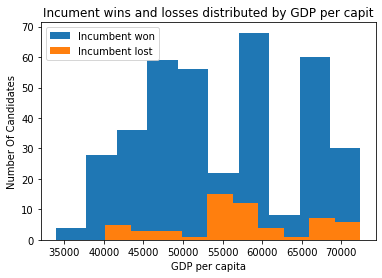

In [32]:
plt.hist(incumbent_wins['2017_GDP'], label='Incumbent won')
plt.hist(incumbent_loss['2017_GDP'], label= 'Incumbent lost')
plt.xlabel('GDP per capita')
plt.ylabel('Number Of Candidates')
plt.title('Incument wins and losses distributed by GDP per capit')
plt.legend()


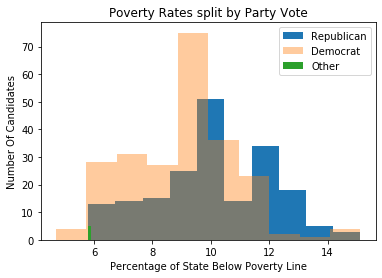

In [33]:
plt.hist(model_frame[model_frame['class'] == 0]['poverty'], label = 'Republican')
plt.hist(model_frame[model_frame['class'] == 1]['poverty'], alpha = .4, label = 'Democrat')
plt.hist(model_frame[model_frame['class'] == 2]['poverty'], alpha = 1, label = 'Other')
plt.xlabel('Percentage of State Below Poverty Line')
plt.ylabel('Number Of Candidates')
plt.title('Poverty Rates split by Party Vote')
plt.legend()

Text(0.5, 1.0, 'Bachelors Degree Rates split by Party Vote')

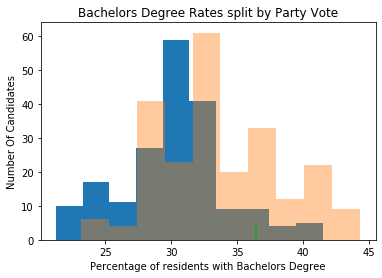

In [34]:
plt.hist(model_frame[model_frame['class'] == 0]['bachelors'], label = 'Republican')
plt.hist(model_frame[model_frame['class'] == 1]['bachelors'], alpha = .4, label = 'Democrat')
plt.hist(model_frame[model_frame['class'] == 2]['bachelors'], alpha = 1, label = 'Other')
plt.xlabel('Percentage of residents with Bachelors Degree')
plt.ylabel('Number Of Candidates')
plt.title('Bachelors Degree Rates split by Party Vote')

In [23]:
model_frame_to_try = model_frame.drop(['state_po','state_district'], axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(model_frame_to_try.drop(['class'], axis=1), model_frame_to_try['class'], test_size=0.2, random_state=42)

In [25]:
X_train = X_train[['incumbency','pres_class','poverty','bachelors','hs','2017_GDP']] # with most standard predictors
X_test = X_test[['incumbency','pres_class', 'poverty','bachelors','hs','2017_GDP']]

In [26]:
random_forest_model = RandomForestClassifier(max_features = int(np.sqrt(X_train.shape[1])), max_depth=5, n_estimators = 55)
random_forest_model.fit(X_train, y_train)

random_forest_train_predictions = random_forest_model.predict(X_train)
random_forest_test_predictions = random_forest_model.predict(X_test)

random_forest_train_score = accuracy_score(y_train, random_forest_train_predictions)
random_forest_test_score = accuracy_score(y_test, random_forest_test_predictions)

print("Random Forest Train Score: " + str(random_forest_train_score))
print("Random Forest Test Score: " + str(random_forest_test_score))

Random Forest Train Score: 0.8859649122807017
Random Forest Test Score: 0.9069767441860465


In [27]:
X_train = X_train[['pres_class','poverty','bachelors','hs','2017_GDP']] # without district incumbency information
X_test = X_test[['pres_class', 'poverty','bachelors','hs','2017_GDP']]

In [28]:
random_forest_model = RandomForestClassifier(max_features = int(np.sqrt(X_train.shape[1])), max_depth=5, n_estimators = 55)
random_forest_model.fit(X_train, y_train)

random_forest_train_predictions = random_forest_model.predict(X_train)
random_forest_test_predictions = random_forest_model.predict(X_test)

random_forest_train_score = accuracy_score(y_train, random_forest_train_predictions)
random_forest_test_score = accuracy_score(y_test, random_forest_test_predictions)

print("Random Forest Train Score: " + str(random_forest_train_score))
print("Random Forest Test Score: " + str(random_forest_test_score))

Random Forest Train Score: 0.7456140350877193
Random Forest Test Score: 0.7325581395348837


In [29]:
X_train = X_train[['poverty','bachelors','hs','2017_GDP']] # without 2016 presidential election information
X_test = X_test[['poverty','bachelors','hs','2017_GDP']]

In [30]:
random_forest_model = RandomForestClassifier(max_features = int(np.sqrt(X_train.shape[1])), max_depth=5, n_estimators = 55)
random_forest_model.fit(X_train, y_train)

random_forest_train_predictions = random_forest_model.predict(X_train)
random_forest_test_predictions = random_forest_model.predict(X_test)

random_forest_train_score = accuracy_score(y_train, random_forest_train_predictions)
random_forest_test_score = accuracy_score(y_test, random_forest_test_predictions)

print("Random Forest Train Score: " + str(random_forest_train_score))
print("Random Forest Test Score: " + str(random_forest_test_score))

Random Forest Train Score: 0.7456140350877193
Random Forest Test Score: 0.7325581395348837
